# Sentiment Analysis

We want to develop a system for user sentiment analysis with the amazon_baby dataset. 
Suppose positive, neutral and negative feelings are defined as follows:
There are positive comments that the user has given 4 or 5 stars.
There are negative comments that the user gave 2 or 1 stars.
Neutral reviews are reviews that have been given 3 stars by the user.
Now, with the help of the above tags and logistic classification algorithms, kNN and ANN, classify the comments and then analyze the characteristics of positive comments and negative comments.

# Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/USER/Desktop/AI/HW AI/پروژه/amazon_baby.csv")
data

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


# Preprocessing 

In [3]:
import string

# Removing all singular letters except 'a'
alphabet = list(string.ascii_lowercase)
alphabet = alphabet[1:]

for letter in alphabet:
    data['review'] = data['review'].replace(' '+letter+' ', ' ', regex=True)

# Expanding all words with contractions
data['review'] = data['review'].replace(' re ', ' are ', regex=True)
data['review'] = data['review'].replace(' ve ', ' have ', regex=True)
data['review'] = data['review'].replace(' ll ', ' will ', regex=True)
data['review'] = data['review'].replace('[^\w\s]+', '', regex=True)

# Removing all numbers
data['review'] = data['review'].str.replace(r'\d+', '',regex=True)

# Removing all extra spaces
data['review'] = data['review'].str.replace('\s+', ' ', regex=True)

# Converting all review and titles to lowercase
data['review']=data['review'].str.lower() 
data.head(5)

,name,review,rating
0,Planetwise Flannel Wipes,these flannel wipes are ok but in my opinion n...,3
1,Planetwise Wipe Pouch,it came early and was not disappointed love pl...,5
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase i ha...,5
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried nonstop when i tried...,5


In [4]:
# تعداد داده های خالی
miss_value_review = data['review'].isnull().sum()
miss_value_rating = data['rating'].isnull().sum()
print(f"تعداد داده های خالی در ستون 'review': {miss_value_review}")
print(f"تعداد داده های خالی در ستون 'rating': {miss_value_rating}")
data = data.dropna(subset=['review']) #حذف سطر های خالی

تعداد داده های خالی در ستون 'review': 829
تعداد داده های خالی در ستون 'rating': 0


In [5]:
# تعریف برچسب های مثبت و خنثی و منفی
data['Sentiment'] = data['rating'].apply(lambda rating : +1 if rating > 3 else -1 if rating < 3 else 0)
#1,2 === -1 منفی
#3 === 0 خنثی
#4,5 === +1 مثبت
data

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2910519842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['rating'].apply(lambda rating : +1 if rating > 3 else -1 if rating < 3 else 0)


,name,review,rating,Sentiment
0,Planetwise Flannel Wipes,these flannel wipes are ok but in my opinion n...,3,0
1,Planetwise Wipe Pouch,it came early and was not disappointed love pl...,5,1
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase i ha...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried nonstop when i tried...,5,1
...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,such a great idea very handy to have and look ...,5,1
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,this product rocks it is a great blend of func...,5,1
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kidsi kn...,5,1
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",i am extremely happy with this product i have ...,5,1


# training the machine learning model

فراوانی نظرات مثبت به فراوانی نظرات: 0.7639872579391578


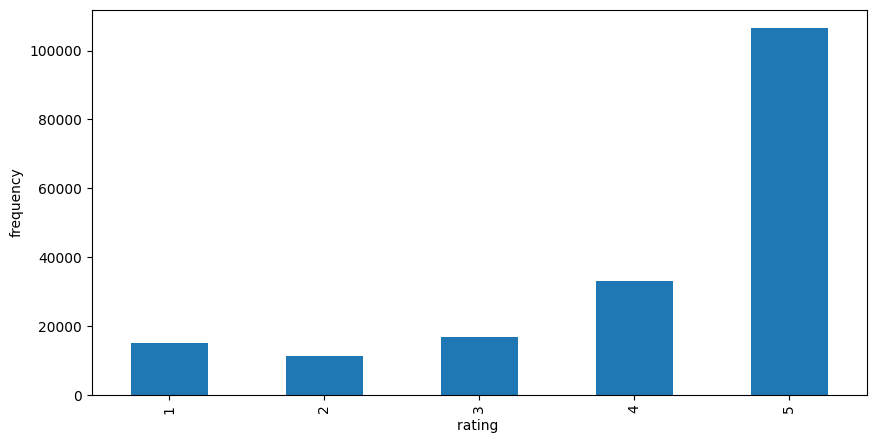

In [6]:
ax = data['rating'].value_counts()\
    .sort_index().plot(kind='bar',
                       figsize=(10,5))
ax.set_xlabel("rating ")
ax.set_ylabel("frequency")

import pandas as pd

count = data[data['rating'].isin([4, 5])].shape[0]
#print(count)
print('فراوانی نظرات مثبت به فراوانی نظرات:', count/len(data['rating']))
#اینجا مشخص است که داده های بیشتر امتیاز مثبت دارند

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(data['review'],data['Sentiment'],test_size=0.2 ,random_state=42)

# KNN

In [8]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
k = 3
from sklearn.neighbors import KNeighborsClassifier
# آموزش مدل kNN
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

# ارزیابی مدل
accuracy = knn_model.score(x_test, y_test)
print(f'Accuracy test: {accuracy:.2f}')
accuracy1 = knn_model.score(x_train, y_train)
print(f'Accuracy train: {accuracy1:.2f}')
from sklearn.metrics import classification_report

# پیشبینی برچسبها برای دادههای تست
y_pred = knn_model.predict(x_test)

# محاسبه و نمایش گزارش دستهبندی
report = classification_report(y_test, y_pred, target_names=['منفی', 'خنثی', 'مثبت'])
print(report)

Accuracy test: 0.77
Accuracy train: 0.77
              precision    recall  f1-score   support

        منفی       0.25      0.01      0.01      5252
        خنثی       0.20      0.00      0.00      3236
        مثبت       0.77      1.00      0.87     28053

    accuracy                           0.77     36541
   macro avg       0.41      0.33      0.29     36541
weighted avg       0.64      0.77      0.67     36541



In [9]:
from sklearn.metrics import classification_report

# پیشبینی برچسبها برای دادههای تست
y_pred = knn_model.predict(x_test)

# محاسبه و نمایش گزارش دستهبندی
report = classification_report(y_test, y_pred, target_names=['منفی', 'خنثی', 'مثبت'])
print(report)

              precision    recall  f1-score   support

        منفی       0.25      0.01      0.01      5252
        خنثی       0.20      0.00      0.00      3236
        مثبت       0.77      1.00      0.87     28053

    accuracy                           0.77     36541
   macro avg       0.41      0.33      0.29     36541
weighted avg       0.64      0.77      0.67     36541



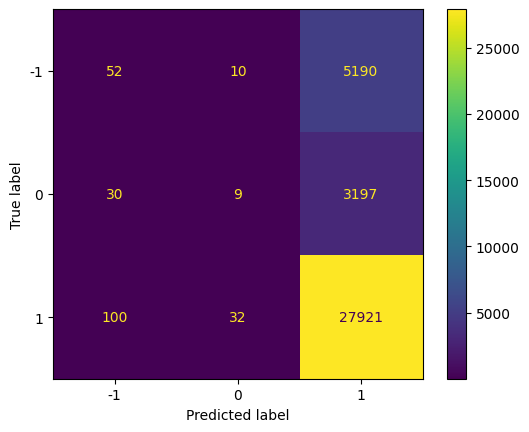

In [9]:
#k=3
from sklearn.metrics import confusion_matrix
from sklearn import metrics
pred=knn_model.predict(x_test)
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [-1, 0, +1])

cm_display.plot()
plt.show()

# ANN

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
# تقسیم داده ها به دو بخش آموزشی و تست
x_train ,x_test,y_train,y_test=train_test_split(data['review'],data['Sentiment'],test_size=0.2 ,random_state=42)

# وکتورسازی و تبدیل به tf-idf
tfidf_vectorizer = TfidfVectorizer()
train_tfidf = tfidf_vectorizer.fit_transform(x_train)
test_tfidf = tfidf_vectorizer.transform(x_test)

# کاهش ابعاد با استفاده از TruncatedSVD
svd = TruncatedSVD(n_components=150) # استفاده از 150 مؤلفه
train_tfidf_svd = svd.fit_transform(train_tfidf)
test_tfidf_svd = svd.transform(test_tfidf)

# آموزش مدل شبکه عصبی 
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
    solver='adam', alpha=0.0001, verbose=True, learning_rate='constant', learning_rate_init=0.001, max_iter=200)

mlp.fit(train_tfidf_svd, y_train)

# پیشبینی بر روی داده های ترین و تست با استفاده از داده های کاهش ابعاد یافته
train_predictions = mlp.predict(train_tfidf_svd)
test_predictions = mlp.predict(test_tfidf_svd)
accuracy = accuracy_score(y_test, test_predictions)
accuracy1 = accuracy_score(y_train, train_predictions)
print(f'Accuracy test: {accuracy * 100:.2f}%')
print(f'Accuracy train: {accuracy1 * 100:.2f}%')
print(classification_report(y_test, test_predictions))

Iteration 1, loss = 0.53968413
Iteration 2, loss = 0.46274479
Iteration 3, loss = 0.45757136
Iteration 4, loss = 0.45228662
Iteration 5, loss = 0.44677716
Iteration 6, loss = 0.44158091
Iteration 7, loss = 0.43683476
Iteration 8, loss = 0.43249883
Iteration 9, loss = 0.42848773
Iteration 10, loss = 0.42472145
Iteration 11, loss = 0.42168925
Iteration 12, loss = 0.41845818
Iteration 13, loss = 0.41607369
Iteration 14, loss = 0.41374740
Iteration 15, loss = 0.41146399
Iteration 16, loss = 0.40942536
Iteration 17, loss = 0.40753219
Iteration 18, loss = 0.40554351
Iteration 19, loss = 0.40389434
Iteration 20, loss = 0.40201915
Iteration 21, loss = 0.40061492
Iteration 22, loss = 0.39887984
Iteration 23, loss = 0.39751629
Iteration 24, loss = 0.39600238
Iteration 25, loss = 0.39455590
Iteration 26, loss = 0.39330666
Iteration 27, loss = 0.39166199
Iteration 28, loss = 0.39056861
Iteration 29, loss = 0.38924143
Iteration 30, loss = 0.38796598
Iteration 31, loss = 0.38665442
Iteration 32, los

C:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy test: 81.40%
Accuracy train: 87.13%
              precision    recall  f1-score   support

          -1       0.62      0.56      0.59      5252
           0       0.30      0.17      0.21      3236
           1       0.88      0.94      0.90     28053

    accuracy                           0.81     36541
   macro avg       0.60      0.55      0.57     36541
weighted avg       0.79      0.81      0.80     36541



In [10]:
train_predictions = mlp.predict(train_tfidf_svd)
test_predictions = mlp.predict(test_tfidf_svd)
accuracy = accuracy_score(y_test, test_predictions)
accuracy1 = accuracy_score(y_train, train_predictions)
print(f'Accuracy test: {accuracy * 100:.2f}%')
print(f'Accuracy train: {accuracy1 * 100:.2f}%')

print(classification_report(y_test, test_predictions))

Accuracy test: 81.40%
Accuracy train: 87.15%
              precision    recall  f1-score   support

          -1       0.60      0.60      0.60      5252
           0       0.31      0.16      0.21      3236
           1       0.88      0.93      0.90     28053

    accuracy                           0.81     36541
   macro avg       0.60      0.56      0.57     36541
weighted avg       0.79      0.81      0.80     36541



In [14]:
train_predictions = mlp.predict(train_tfidf_svd)
test_predictions = mlp.predict(test_tfidf_svd)
accuracy = accuracy_score(test_data['Sentiment'], test_predictions)
accuracy1 = accuracy_score(train_data['Sentiment'], train_predictions)
print(f'Accuracy test: {accuracy * 100:.2f}%')
print(f'Accuracy train: {accuracy1 * 100:.2f}%')

print(classification_report(test_data['Sentiment'], test_predictions))

Accuracy test: 81.17%
Accuracy train: 87.28%
              precision    recall  f1-score   support

          -1       0.61      0.56      0.59      5252
           0       0.30      0.19      0.24      3236
           1       0.88      0.93      0.90     28053

    accuracy                           0.81     36541
   macro avg       0.60      0.56      0.58     36541
weighted avg       0.79      0.81      0.80     36541



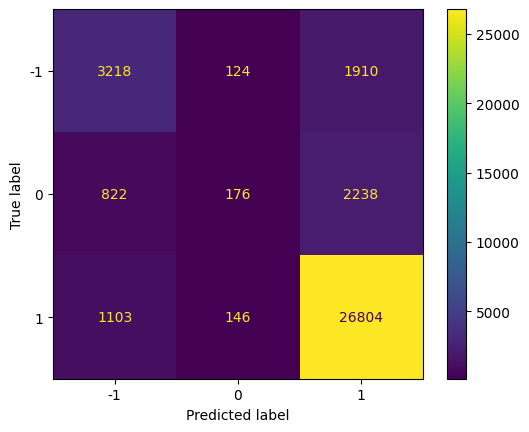

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# پیشبینی برچسب ها با استفاده از مدل آموزش دیده
pred = mlp_model.predict(test_matrix_scaled)

# محاسبه confusion matrix
cm = confusion_matrix(y_test, pred)

# نمایش confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
cm_display.plot()

plt.show()

# logestic reggretion

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# ایجاد یک pipeline
pipeline = Pipeline([
('tfidf', TfidfVectorizer(ngram_range=(2, 3))),
('logreg', LogisticRegression(solver='liblinear'))
])

# تنظیم پارامترها برای GridSearchCV
parameters = {'tfidf__max_df': (0.5, 0.75, 1.0),'tfidf__min_df': (1, 2),'logreg__C': (0.01, 0.1, 1, 10)}
# حداکثر تکرار مجاز - حداقل نویز شدن

# اجرای GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=3 , n_jobs=-1)
grid_search.fit(train_data['review'], train_data['Sentiment'])

best_model = grid_search.best_estimator_ # بهترین مدل پیدا شده

# پیشبینی بر روی دادههای تست با بهترین مدل
test_predictions = best_model.predict(test_data['review'])
train_predictions =  best_model.predict(train_data['review'])


# نمایش بهترین پارامترهای پیدا شده توسط GridSearchCV
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# محاسبه دقت و گزارش دستهبندی با بهترین مدل
accuracy = accuracy_score(test_data['Sentiment'], test_predictions)
accuracy1 = accuracy_score(train_data['Sentiment'], train_predictions)
print(f'Accuracy test with best model: {accuracy * 100:.2f}%')
print(f'Accuracy train with best model: {accuracy1 * 100:.2f}%')
print(classification_report(test_data['Sentiment'], test_predictions))

Best parameters found: {'logreg__C': 10, 'tfidf__max_df': 0.75, 'tfidf__min_df': 1}
Accuracy test with best model: 87.42%
Accuracy train with best model: 99.36%
              precision    recall  f1-score   support

          -1       0.78      0.74      0.76      5252
           0       0.50      0.24      0.32      3236
           1       0.91      0.97      0.94     28053

    accuracy                           0.87     36541
   macro avg       0.73      0.65      0.67     36541
weighted avg       0.85      0.87      0.86     36541



In [42]:
# تبدیل دادههای متنی به ماتریس TF-IDF

features_df# استخراج وزن های ویژگی ها از مدل رگرسیون لجستیک
logreg = best_model.named_steps['logreg']
tfidf = best_model.named_steps['tfidf']
feature_names = tfidf.get_feature_names_out()
coefficients = logreg.coef_[0]

# ایجاد یک DataFrame برای ویژگی ها و وزن های مربوطه
feature_weights = pd.DataFrame({
    'feature': feature_names,
    'weight': coefficients
})

# مرتب سازی ویژگی ها بر اساس وزن ها
sorted_feature_weights = feature_weights.sort_values(by='weight', ascending=False)

sorted_feature_weights

,feature,weight
886862,not recommend,17.870184
883453,not,15.243112
1467482,useless,13.800345
1441724,two stars,12.812810
1017875,poor,12.678628
...,...,...
400101,easy,-12.888015
769432,loves,-13.445964
988550,perfect,-16.361037
547826,great,-19.930086


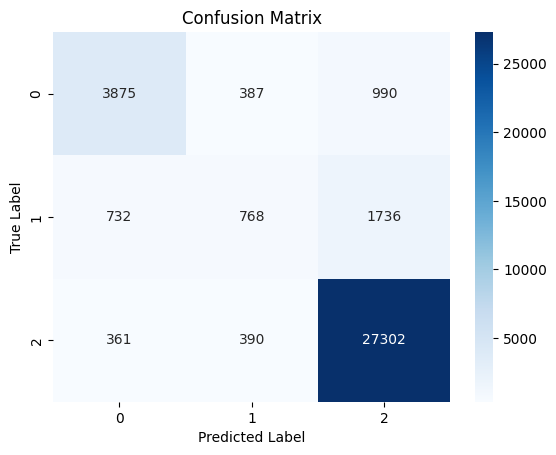

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# محاسبه confusion matrix
conf_matrix = confusion_matrix(test_data['Sentiment'], test_predictions)

# رسم نمودار confusion matrix با استفاده از seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
filtered_features = features_df[(features_df['Weight'] > 8) | (features_df['Weight'] < -8)]

# تبدیل نتایج به لیست
filtered_features_list = filtered_features['Feature'].tolist()

# تابعی برای پیدا کردن کلمات مشترک در هر سطر
def find_common_words(review):
    return [word for word in review.split() if word in filtered_features_list]

# اعمال تابع بر روی هر سطر از ستون 'review' و ایجاد ستون جدید 'common_words'
data['common_words'] = data['review'].apply(find_common_words)

# نمایش DataFrame با ستون جدید
data

C:\Users\USER\AppData\Local\Temp\ipykernel_27884\2979481989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['common_words'] = data['review'].apply(find_common_words)


,name,review,rating,Sentiment,common_words
0,Planetwise Flannel Wipes,these flannel wipes are ok but in my opinion n...,3,0,[not]
1,Planetwise Wipe Pouch,it came early and was not disappointed love pl...,5,1,"[not, disappointed, love, not]"
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5,1,[]
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase i ha...,5,1,"[not, love, loves, little, love]"
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried nonstop when i tried...,5,1,"[loves, easy, great]"
...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,such a great idea very handy to have and look ...,5,1,"[great, not, great]"
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,this product rocks it is a great blend of func...,5,1,[great]
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kidsi kn...,5,1,"[great, great]"
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",i am extremely happy with this product i have ...,5,1,"[happy, not, easy, easy]"


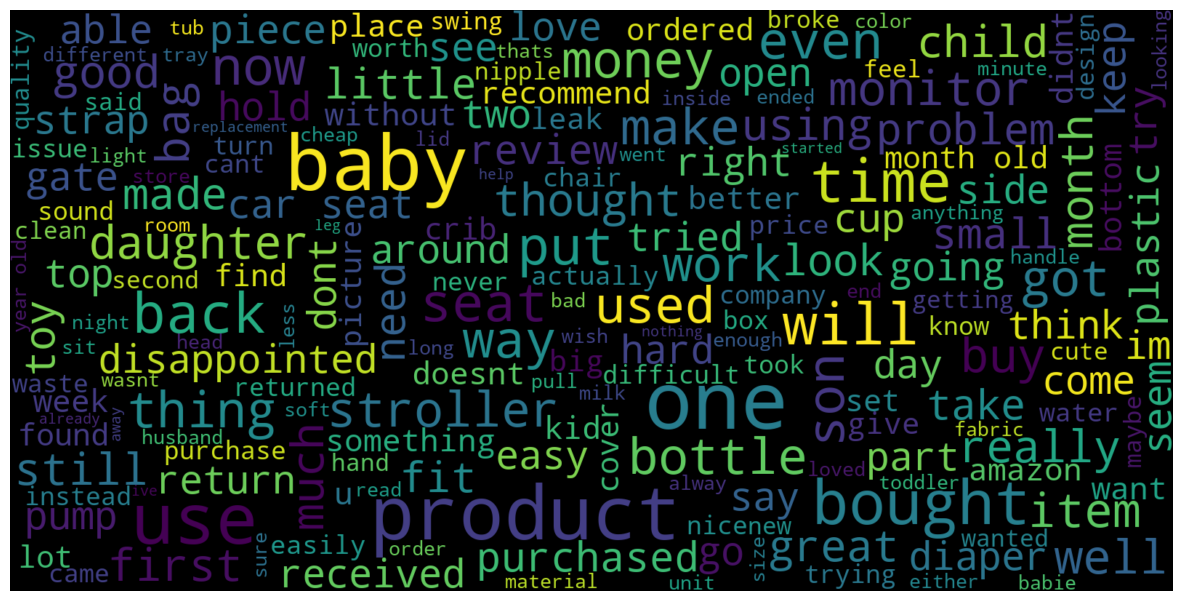

In [19]:
consolidated=' '.join(word for word in data['review'][data['Sentiment']==-1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

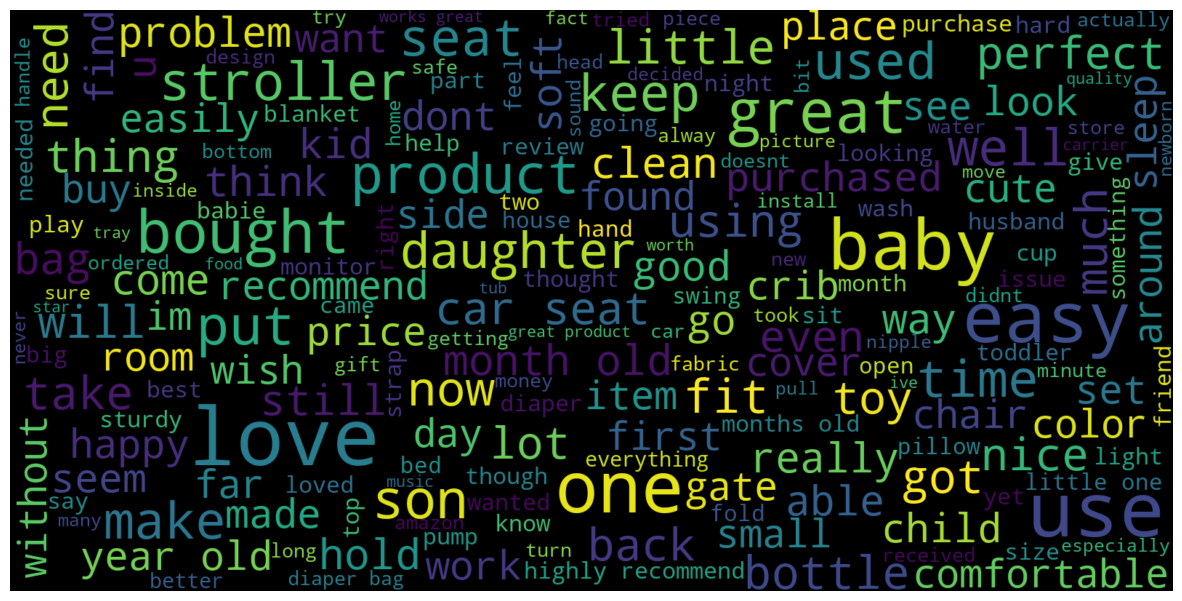

In [18]:
consolidated=' '.join(word for word in data['review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
import numpy as np

def find_influential_words(review, vectorizer, model, top_n=5):
# تبدیل نظر به بردار با استفاده از vectorizer
    review_vector = vectorizer.transform([review])
# پیشبینی کلاس و احتمالات مربوط به هر کلاس
    predicted_class = model.predict(review_vector)
    probabilities = model.predict_proba(review_vector)
# استخراج وزنهای مدل برای کلاس پیشبینی شده
    class_index = np.where(model.classes_ == predicted_class[0])[0][0]
    class_weights = model.coef_[class_index]
# ترتیب وزنها و استخراج ویژگیهای مرتبط
    sorted_indices = np.argsort(class_weights)
    top_positive_indices = sorted_indices[-top_n:]
    top_negative_indices = sorted_indices[:top_n]
# استخراج نام ویژگیها و وزنهای مربوطه
    feature_names = vectorizer.get_feature_names_out()
    top_positive_features = [(feature_names[i], class_weights[i]) for i in top_positive_indices]
    top_negative_features = [(feature_names[i], class_weights[i]) for i in top_negative_indices]

    return {'predicted_class': predicted_class[0],'top_positive_features': top_positive_features,'top_negative_features': top_negative_features}

# مثال استفاده از تابع
find_influential_words(data['review'][500], vectorizer, logistic_model)


{'predicted_class': -1,
 'top_positive_features': [('useless', 1.0801592300793679),
  ('waste', 1.1280618208245132),
  ('returning', 1.133952740470031),
  ('poor', 1.1361784870387512),
  ('returned', 1.1776748816507312)],
 'top_negative_features': [('perfectly', -0.8325636199716611),
  ('exactly', -0.7673176887980713),
  ('glad', -0.7658073196717943),
  ('awesome', -0.7535315567696178),
  ('excellent', -0.7466620019974148)]}